In [1]:
import pandas as pd
import numpy as np
import matplotlib. pylab as plt
%matplotlib inline
from pylab import savefig
from sklearn.ensemble import IsolationForest
from matplotlib import rc, font_manager
#import pandas_profiling

In [2]:
#df = pd.read_csv("C:/Users/Lee Jung Un/Documents/data/train_V2.csv", sep=',', encoding="euc-kr")
file = open("C:/Users/Lee Jung Un/Documents/data/train_V2.csv")
dataset = pd.read_csv(file, index_col = 0)

#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc("font", family=font_name)
#df = df.set_index("Id")

#pd.set_option('display.max_columns', 200)

In [5]:
dataset.shape

(4446966, 28)

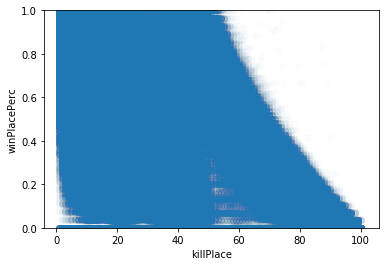

In [20]:
x= dataset['killPlace']
y= dataset['winPlacePerc']
plt.scatter(x, y,alpha=0.01)
plt.xlabel('killPlace')
plt.ylabel('winPlacePerc')
#plt.xlim(0, 10000)
plt.ylim(0, 1)
plt.show()

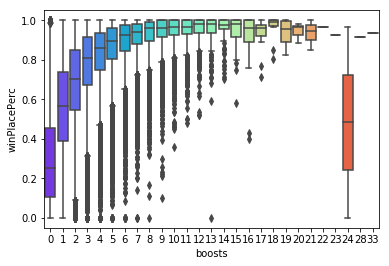

In [17]:
import seaborn as sns
sns.boxplot(x='boosts', y='winPlacePerc', data=dataset, palette='rainbow')

(0, 20)

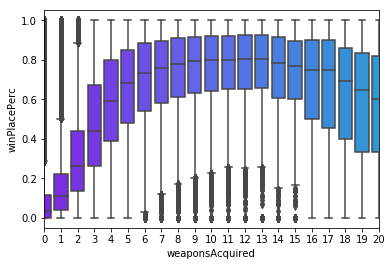

In [19]:
import seaborn as sns
sns.boxplot(x='weaponsAcquired', y='winPlacePerc', data=dataset, palette='rainbow')
plt.xlim(0, 20)

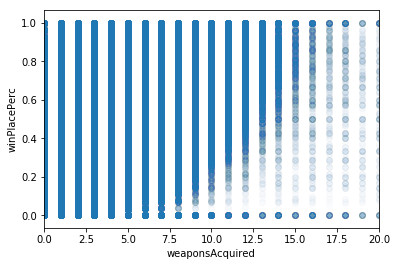

In [20]:
x= dataset['weaponsAcquired']
y= dataset['winPlacePerc']
plt.scatter(x, y,alpha=0.01)
plt.xlabel('weaponsAcquired')
plt.ylabel('winPlacePerc')
plt.xlim(0, 20)
#plt.ylim(0, 1)
plt.show()

In [3]:
# TotalDistance = swimDistance + rideDistance + walkDistance
#df["TotalDistance"]= df["swimDistance"] + df["rideDistance"] + df["walkDistance"]
#df.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.isnull().sum()

groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [15]:
from pyecharts import Scatter

In [27]:
plt.figure(figsize=(7, 5))
plt.scatter(x="killPlace",y="winPlacePerc",c=c,marker='o')
plt.colorbar()
plt.grid(True)
plt.xlabel('killPlace')
plt.ylabel('winPlacePerc')

NameError: name 'c' is not defined

In [26]:
df.plot(x="killPlace",y="winPlacePerc", kind="scatter", figsize = (15,10), c=c, marker='o')
plt.colorbar()
plt.show()

NameError: name 'c' is not defined

In [ ]:
bar = pyecharts.Bar("Bar chart", "precipitation and evaporation one year")
bar.add("precipitation", attr, v1, mark_line=["average"], mark_point=["max", "min"])
bar.add("evaporation", attr, v2, mark_line=["average"], mark_point=["max", "min"])
bar.height = 500
bar.width = 800


In [4]:
#존버 분석
filter1 = df[df["kills"]==0]
jonbu = filter1[filter1["winPlacePerc"]==1.0]
jonbu.describe()
#.sort_values("winPlacePerc",ascending=0).head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,TotalDistance
count,16666.000000,16666.000000,16666.000000,16666.000000,16666.0,16666.000000,16666.000000,16666.000000,16666.0,16666.0,16666.0,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.0,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.000000,16666.0,16666.000000
mean,0.642026,2.184027,78.442277,0.154206,0.0,2.324553,38.862054,503.947258,0.0,0.0,0.0,1586.858994,29.086883,27.250750,914.486739,0.255010,1342.730000,0.0,10.165522,0.015901,0.010680,2402.841817,5.123005,602.870155,1.0,3755.737339
std,0.917030,2.006928,91.236693,0.427925,0.0,3.289196,10.400408,637.830506,0.0,0.0,0.0,265.685366,7.468828,9.065078,742.045236,0.568194,2242.980513,0.0,43.624802,0.128875,0.106241,1308.724474,2.623028,749.968971,0.0,2688.875910
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,152.000000,2.000000,2.000000,-1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,38.000000,0.000000,0.0,0.0,0.0,1365.000000,27.000000,26.000000,-1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1645.000000,3.000000,0.000000,1.0,2235.550000
50%,0.000000,2.000000,53.840000,0.000000,0.0,1.000000,41.000000,0.000000,0.0,0.0,0.0,1449.000000,28.000000,27.000000,1451.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2638.000000,5.000000,0.000000,1.0,3267.685000
75%,1.000000,3.000000,116.400000,0.000000,0.0,3.000000,44.000000,1197.000000,0.0,0.0,0.0,1841.000000,29.000000,29.000000,1500.000000,0.000000,2022.000000,0.0,0.000000,0.000000,0.000000,3256.000000,6.000000,1500.000000,1.0,5041.000000
max,7.000000,14.000000,1194.000000,7.000000,0.0,34.000000,70.000000,2037.000000,0.0,0.0,0.0,2218.000000,97.000000,95.000000,3636.000000,6.000000,31020.000000,0.0,1245.000000,4.000000,2.000000,10780.000000,52.000000,1967.000000,1.0,31636.200000


In [ ]:
df['killPoints'].unique()

In [ ]:
plt.scatter(df['walkDistance'], df['winPlacePerc'])
plt.show()

In [ ]:
df['winPlacePerc'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
plt.boxplot(df['kills'])

In [ ]:
df['kills'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
plt.boxplot(df['DBNOs'])

In [ ]:
df['DBNOs'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
plt.boxplot(df['killPoints'])

In [ ]:
df['killPoints'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
plt.boxplot(df['TotalDistance'])

In [ ]:
plt.scatter(df['DBNOs'], df['winPlacePerc'])
plt.show()

In [ ]:
plt.scatter(df['kills'], df['winPlacePerc'])
plt.show()

In [ ]:
plt.scatter(df['killPoints'], df['winPlacePerc'])
plt.show()

In [ ]:
pd.crosstab(df['kills'],df['winPlacePerc'])

In [ ]:
df['killPoints'].groupby(df['winPlacePerc']).mean().plot()

In [ ]:
df['matchId'].unique()

In [ ]:
df['matchType'].unique()

In [ ]:
# a single match
df_match1 = df[df["matchType"]=="squad-fpp"]

In [ ]:
df_match1["matchId"].unique()

In [ ]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [ ]:
# 매치 타입 별 승률
a = df_match1[df_match1["matchType"]=="duo"].sort_values("winPlacePerc",ascending=0)
#a.to_excel("C:/day/Last_Project/result/duo.xlsx", sheet_name='duo')
a.head()

In [ ]:
# 이동거리가 많으면 승률이 높나?

In [ ]:
corr = df.ix[:,3:30].corr(method = 'pearson')
#corr.save("C:/day/Last_Project/result/corr.csv")

In [ ]:
import pandas_profiling

#pandas_profiling.ProfileReport(df)

In [ ]:
import pandas_profiling

match_1 = df[df['matchId']=='68f4d176d15fae']
#pandas_profiling.ProfileReport(match_1)



pandas_profiling.ProfileReport(match_1)

In [ ]:
count_match_1 = match_1.groupby("groupId").sum()
print(count_match_1)

In [ ]:
agg = match_1.groupby(['groupId']).size().to_frame('players_in_team')
match_1_count = match_1.merge(agg, how='left', on=['groupId'])
match_1_count.to_excel("C:/day/Last_Project/result/match_1_count.xlsx", sheet_name='sheet1')

In [ ]:
df["matchType"]

In [ ]:
#agg = df.groupby(['matchType']).sum().to_frame('matchType_in_team')
#match_type = df.merge(agg, how='left', on=['matchType'])
#match_type.to_excel("C:/day/Last_Project/result/match_type.xlsx", sheet_name='sheet1')
#match_type.head()

solo = df[df['matchType']=='solo']
pandas_profiling.ProfileReport(solo)

In [ ]:
squad = df[df['matchType']=='squad']
pandas_profiling.ProfileReport(squad)

In [ ]:
duo = df[df['matchType']=='duo']
pandas_profiling.ProfileReport(duo)

In [ ]:
agg = df.groupby(['matchType']).sum().to_frame('matchType_in_team')
match_type = df.merge(agg, how='left', on=['matchType'])
match_type.to_excel("C:/day/Last_Project/result/match_type.xlsx", sheet_name='sheet1')
match_type.head()